In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [2]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output



TEST SIZE 80: 20

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [4]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [5]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)



Epoch 1/50

3/3 - 2s - loss: 0.1790 - val_loss: 0.1420 - 2s/epoch - 642ms/step
Epoch 2/50
3/3 - 0s - loss: 0.1550 - val_loss: 0.1916 - 51ms/epoch - 17ms/step
Epoch 3/50
3/3 - 0s - loss: 0.1351 - val_loss: 0.2439 - 50ms/epoch - 17ms/step
Epoch 4/50
3/3 - 0s - loss: 0.1237 - val_loss: 0.3024 - 48ms/epoch - 16ms/step
Epoch 5/50
3/3 - 0s - loss: 0.1121 - val_loss: 0.3582 - 43ms/epoch - 14ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1058 - val_loss: 0.4109 - 43ms/epoch - 14ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1028 - val_loss: 0.4568 - 41ms/epoch - 14ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0991 - val_loss: 0.4840 - 76ms/epoch - 25ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0977 - val_loss: 0.5007 - 57ms/epoch - 19ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0961 - val_loss: 0.5036 - 52ms/epoch - 17ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0943 - val_loss: 0.4955 - 50ms/epoch - 17ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0923 - val_loss: 0.4841 - 49ms/epoch - 16ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0901 - val_loss:

In [7]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

1/1 [==============================] - 0s 46ms/step
Mean Squared Error (MSE): 5929993.869004882
Mean Absolute Error (MAE): 2285.7175682109523
Mean Absolute Percentage Error (MAPE): 22.13%


In [8]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 35ms/step


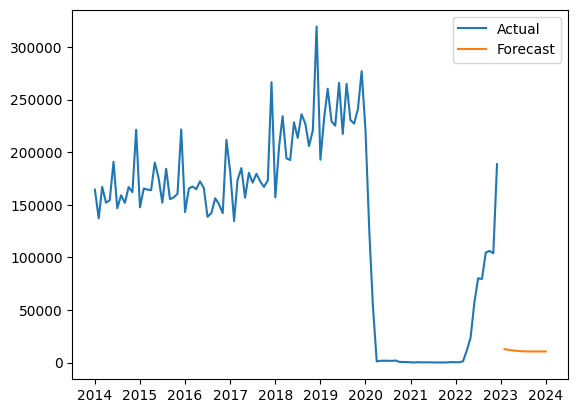

In [9]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.legend()
plt.show()

TEST SIZE 70:30

TEST SIZE 60:40